# Tianyi Zhang 9598110243

-------------

## 1. Time Series Classification

### a)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### b)

In [2]:
data_folder = '..\\data\\AReM'

all_paths = []
train_paths = []
test_paths = []

dirs = os.listdir(data_folder)

for index, dir in enumerate(dirs):
    if os.path.isdir(os.path.join(data_folder,dir)):
        for file in os.listdir(os.path.join(data_folder,dir)):
            all_paths.append(data_folder + '\\' + dir + '\\' + file)

for index, dir in enumerate(dirs):
    if os.path.isdir(os.path.join(data_folder,dir)):
        test_paths.append(data_folder + '\\' + dir + '\\' + 'dataset1.csv')
        test_paths.append(data_folder + '\\' + dir + '\\' + 'dataset2.csv')
        if index > 1:
            test_paths.append(data_folder + '\\' + dir + '\\' + 'dataset3.csv')

train_paths = list(set(all_paths) - set(test_paths))
train_paths.sort(key=all_paths.index)

print(len(all_paths),len(train_paths), len(test_paths))

88 69 19


In [3]:
datalist = []

for filename in train_paths:
    df = pd.read_csv(filename,skiprows=range(4))
    datalist.append(df)

data_train = pd.concat(datalist, axis=0, ignore_index=True)

datalist = []

for filename in test_paths:
#     print(filename)
    df = pd.read_csv(filename,skiprows=range(4))
    datalist.append(df)

data_test = pd.concat(datalist, axis=0, ignore_index=True)

print('training data shape: '+str(data_train.shape))
print('test data shape: '+str(data_test.shape))
print(data_train.head(5).to_string())
print(data_test.head(5).to_string())



training data shape: (33120, 7)
test data shape: (9120, 7)
  # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0               0      42.00       0.71      21.25       0.43      30.00       0.00
1             250      41.50       0.50      20.25       1.48      31.25       1.09
2             500      41.50       0.50      14.25       1.92      33.00       0.00
3             750      40.75       0.83      15.75       0.43      33.00       0.00
4            1000      40.00       0.71      20.00       2.74      32.75       0.43
   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0                0      39.25       0.43      22.75       0.43      33.75        1.3
1              250      39.25       0.43      23.00       0.00      33.00        0.0
2              500      39.25       0.43      23.25       0.43      33.00        0.0
3              750      39.50       0.50      23.00       0.71      33.00        0.0
4           

### c)

#### 1)

**For example: minimum, maximum, mean, median, standard deviation, first quartile, third quartile, skewness, kurtosis**

#### 2)

In [4]:
features = pd.DataFrame()

for fileindex, path in enumerate(all_paths):
    label = path.split("\\")[3]
#     print(path)
    df = pd.read_csv(path,skiprows=range(4))
    
    feature = pd.DataFrame()
    for index, column in enumerate(df.columns[1:]):
        data = {"min(" + str(index + 1) + ")": df[column].min(),
                "max(" + str(index + 1) + ")": df[column].max(),
                "mean(" + str(index + 1) + ")": df[column].mean(),
                "median(" + str(index + 1) + ")": df[column].median(),
                "standard deviation(" + str(index + 1) + ")": df[column].std(),
                "1st quart(" + str(index + 1) + ")": df[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": df[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        feature = pd.concat([feature, temp], axis=1)

    features = features.append(feature)

print(features.head(5))


C:\Users\14294\Anaconda3\envs\py36\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


   min(1)  max(1)    mean(1)  median(1)  standard deviation(1)  1st quart(1)  \
1   37.25   45.00  40.624792      40.50               1.476967         39.25   
2   38.00   45.67  42.812812      42.50               1.435550         42.00   
3   35.00   47.40  43.954500      44.33               1.558835         43.00   
4   33.00   47.75  42.179812      43.50               3.670666         39.15   
5   33.00   45.75  41.678063      41.75               2.243490         41.33   

   3rd quart(1)  min(2)  max(2)   mean(2)  ...  standard deviation(5)  \
1         42.00     0.0    1.30  0.358604  ...               2.188449   
2         43.67     0.0    1.22  0.372437  ...               1.995255   
3         45.00     0.0    1.70  0.426250  ...               1.999604   
4         45.00     0.0    3.00  0.696042  ...               3.849448   
5         42.75     0.0    2.83  0.535979  ...               2.411026   

   1st quart(5)  3rd quart(5)  min(6)  max(6)   mean(6)  median(6)  \
1       33

#### 3)

In [5]:
confidence_interval = {}

for column in features.columns:
    print(column+'std:'+str(features[column].std()))
    range_CI = []
    for i in range(0, 999):
        bs_random = features[column].sample(n=10, replace=True)
        stat = bs_random.std()
        range_CI.append(stat)
    range_CI.sort()
    lowerValue = np.percentile(range_CI, 5)
    upperValue = np.percentile(range_CI, 95)
    confidence_interval[column] = [lowerValue, upperValue]

print(confidence_interval)

min(1)std:9.624010997348854
max(1)std:4.207745343621797
mean(1)std:5.276417064632754
median(1)std:5.386623835566841
standard deviation(1)std:1.7712837746244425
1st quart(1)std:6.127846311115924
3rd quart(1)std:5.03102815565505
min(2)std:0.0
max(2)std:5.059655662560794
mean(2)std:1.5779138121398628
median(2)std:1.4135454830549539
standard deviation(2)std:0.8858736488660912
1st quart(2)std:0.9484336499365661
3rd quart(2)std:2.131337436896012
min(3)std:2.954516411870799
max(3)std:4.819847767790793
mean(3)std:3.9767535130303955
median(3)std:4.009687435531634
standard deviation(3)std:0.951995092289468
1st quart(3)std:4.184148496816389
3rd quart(3)std:4.153450637354357
min(4)std:0.0
max(4)std:2.1818091159504
mean(4)std:1.1682676576131803
median(4)std:1.148590986241616
standard deviation(4)std:0.4586183150540796
1st quart(4)std:0.8449194280417419
3rd quart(4)std:1.5552350114773286
min(5)std:6.121205253516688
max(5)std:5.773354787400726
mean(5)std:5.704025056111314
median(5)std:5.8443683290381

#### 4)

**I can choose min, mean, and max.**

**Because in my result, we can find the standard error for these features are small. So, they are relatively stable.**

### d)

#### 1)

In [6]:
train_features = pd.DataFrame()


for fileindex, path in enumerate(train_paths):
    label = path.split("\\")[3]
    df = pd.read_csv(path,skiprows=range(4))
    
    train_feature = pd.DataFrame()
    for index, column in enumerate(df.columns[1:]):
        data = {"min(" + str(index + 1) + ")": df[column].min(),
                "max(" + str(index + 1) + ")": df[column].max(),
                "mean(" + str(index + 1) + ")": df[column].mean(),
                "median(" + str(index + 1) + ")": df[column].median(),
                "standard deviation(" + str(index + 1) + ")": df[column].std(),
                "1st quart(" + str(index + 1) + ")": df[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": df[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        train_feature = pd.concat([train_feature, temp], axis=1)
        
    train_feature["label"] = 1 if label == "bending1" or label == 'bending2' else 0
    train_features = train_features.append(train_feature)
    
print(train_features.head(5))

   min(1)  max(1)    mean(1)  median(1)  standard deviation(1)  1st quart(1)  \
1   35.00   47.40  43.954500      44.33               1.558835         43.00   
2   33.00   47.75  42.179812      43.50               3.670666         39.15   
3   33.00   45.75  41.678063      41.75               2.243490         41.33   
4   37.00   48.00  43.454958      43.25               1.386098         42.50   
5   36.25   48.00  43.969125      44.50               1.618364         43.31   

   3rd quart(1)  min(2)  max(2)   mean(2)  ...  1st quart(5)  3rd quart(5)  \
1         45.00     0.0    1.70  0.426250  ...       35.3625         36.50   
2         45.00     0.0    3.00  0.696042  ...       30.4575         36.33   
3         42.75     0.0    2.83  0.535979  ...       28.4575         31.25   
4         45.00     0.0    1.58  0.378083  ...       22.2500         24.00   
5         44.67     0.0    1.50  0.413125  ...       20.5000         23.75   

   min(6)  max(6)   mean(6)  median(6)  standard d

C:\Users\14294\Anaconda3\envs\py36\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\14294\Anaconda3\envs\py36\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


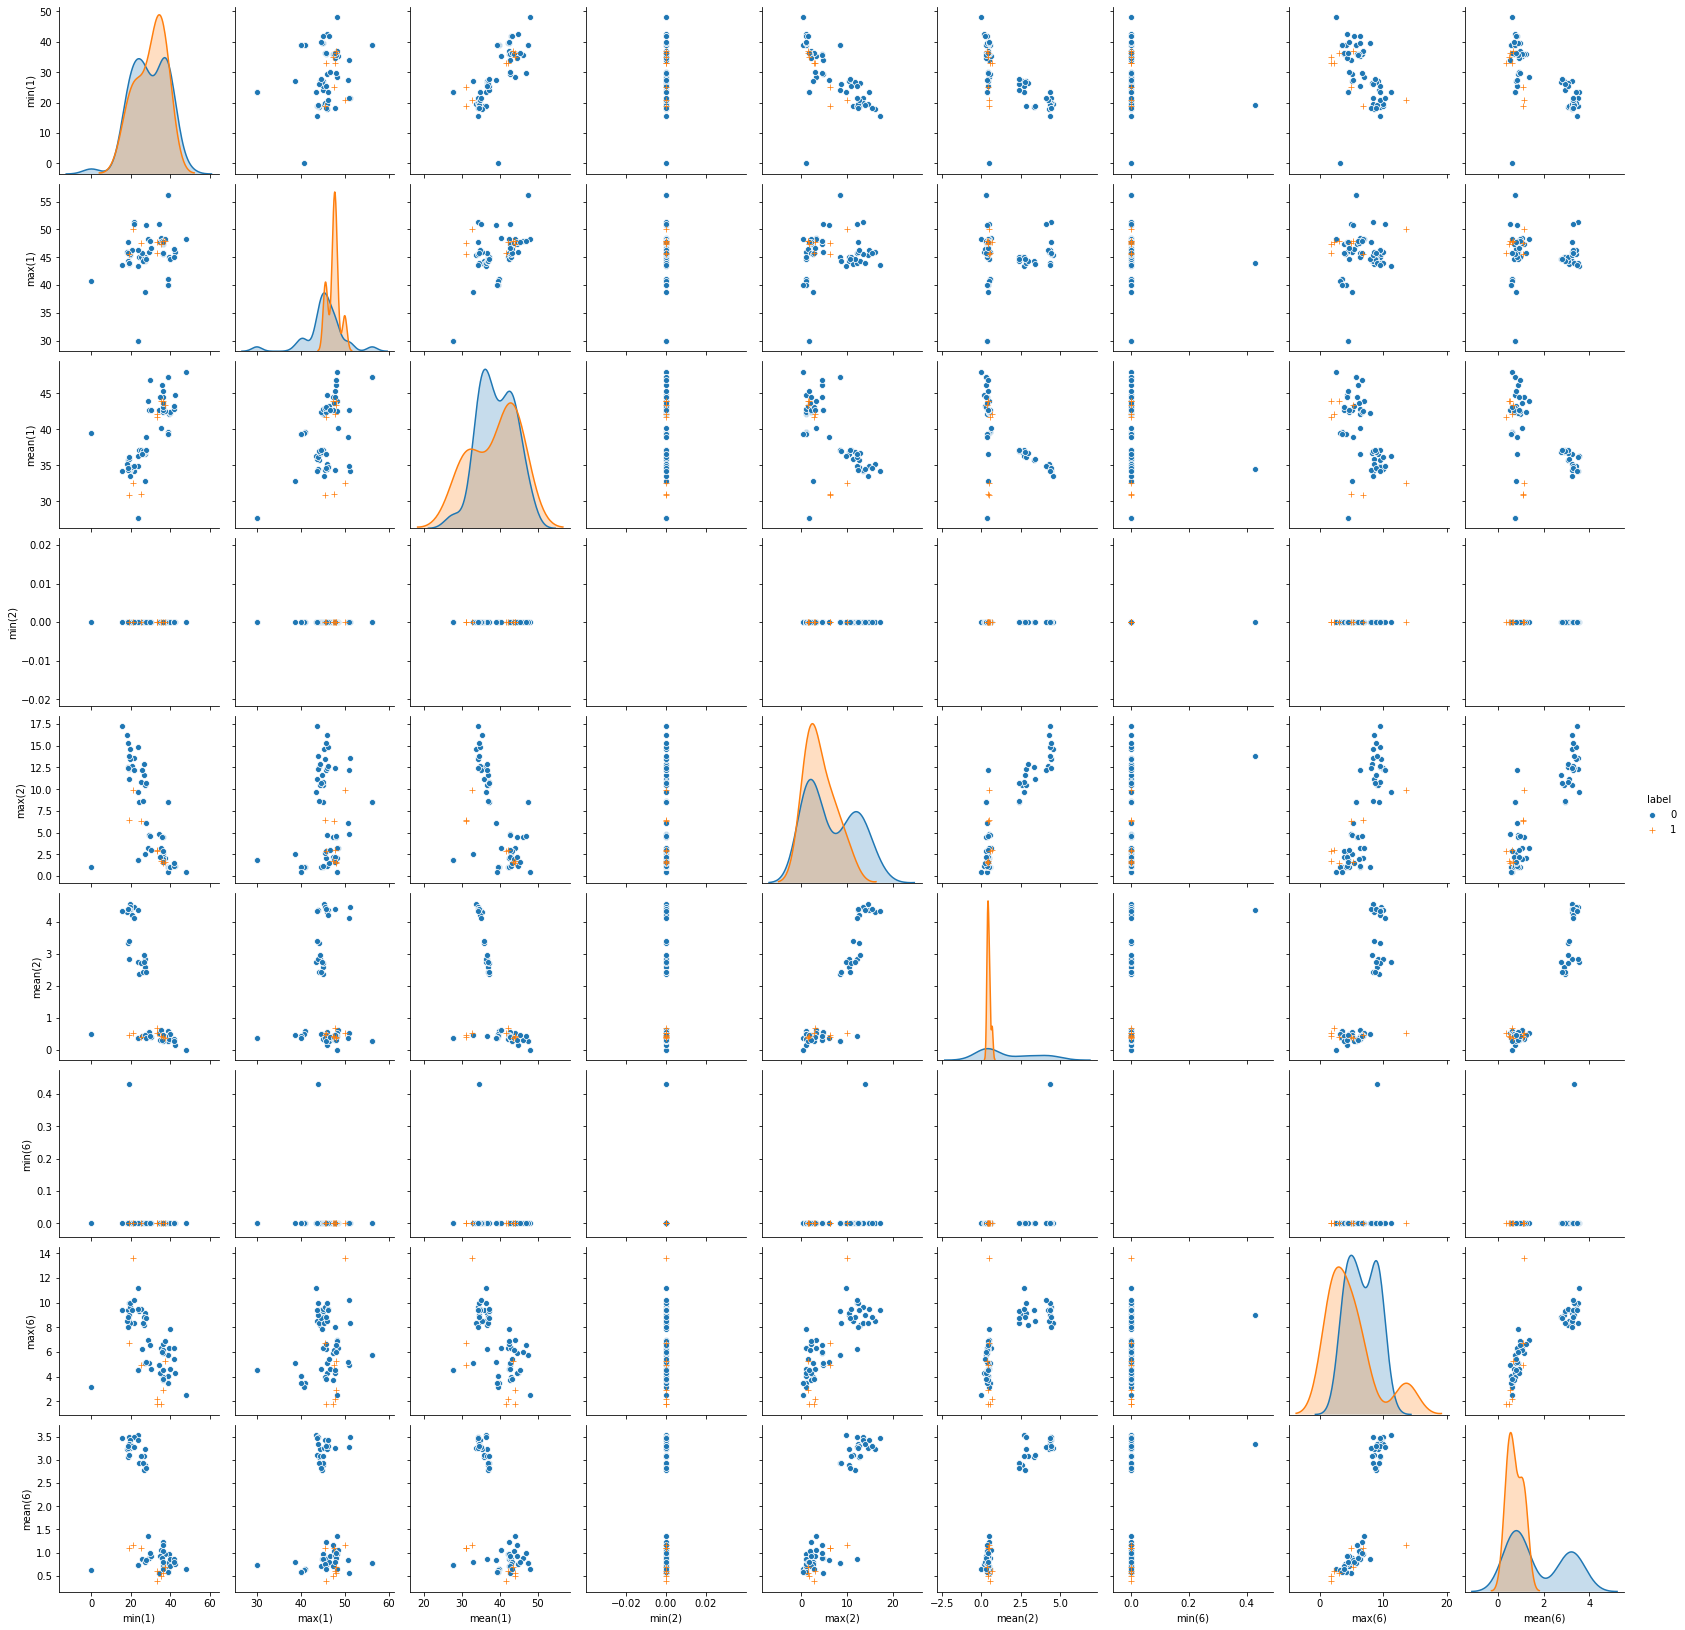

In [7]:
feature_columns = ['min(1)', 'max(1)', 'mean(1)', 'min(2)', 'max(2)', 'mean(2)', 'min(6)', 
            'max(6)', 'mean(6)', 'label']
specified_features = train_features[feature_columns]
# print(specified_features.to_string())
sns.pairplot(specified_features, hue="label", markers=["o", "+"])
plt.show()

#### 2)

In [8]:
train_features = pd.DataFrame()

for fileindex, path in enumerate(train_paths):
    label = path.split("\\")[3]
    df = pd.read_csv(path,skiprows=range(4))
    df1 = df.iloc[:240]
    df2 = df.iloc[240:,1:]
    df2.columns = range(6)
    dataset = pd.concat([df1, df2], axis=1)
#     print(dataset.columns[1:])
    train_feature = pd.DataFrame()
    for index, column in enumerate(dataset.columns[1:]):
        data = {"min(" + str(index + 1) + ")": dataset[column].min(),
                "max(" + str(index + 1) + ")": dataset[column].max(),
                "mean(" + str(index + 1) + ")": dataset[column].mean(),
                "median(" + str(index + 1) + ")": dataset[column].median(),
                "standard deviation(" + str(index + 1) + ")": dataset[column].std(),
                "1st quart(" + str(index + 1) + ")": dataset[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": dataset[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        train_feature = pd.concat([train_feature, temp], axis=1)
        
    train_feature["label"] = 1 if label == "bending1" or label == 'bending2' else 0
    train_features = train_features.append(train_feature)
    
print(train_features.head(5))


   min(1)  max(1)    mean(1)  median(1)  standard deviation(1)  1st quart(1)  \
1   36.50   46.50  44.057167      44.50               1.556971       43.2500   
2   33.75   47.75  43.278875      45.00               3.473355       42.0000   
3   33.00   45.75  41.621208      42.33               3.118644       39.6525   
4   39.00   48.00  44.117042      45.00               1.359836       43.5000   
5   36.67   45.00  43.486208      43.71               1.281976       42.3300   

   3rd quart(1)  min(2)  max(2)   mean(2)  ...  1st quart(11)  3rd quart(11)  \
1         45.00     0.0    1.50  0.381042  ...          33.00        36.2500   
2         45.25     0.0    3.00  0.673292  ...          28.75        33.7500   
3         44.25     0.0    2.83  0.623083  ...          28.31        30.5625   
4         45.00     0.0    1.30  0.250042  ...          22.50        23.7500   
5         44.50     0.0    1.30  0.378667  ...          21.00        23.5000   

   min(12)  max(12)  mean(12)  median(

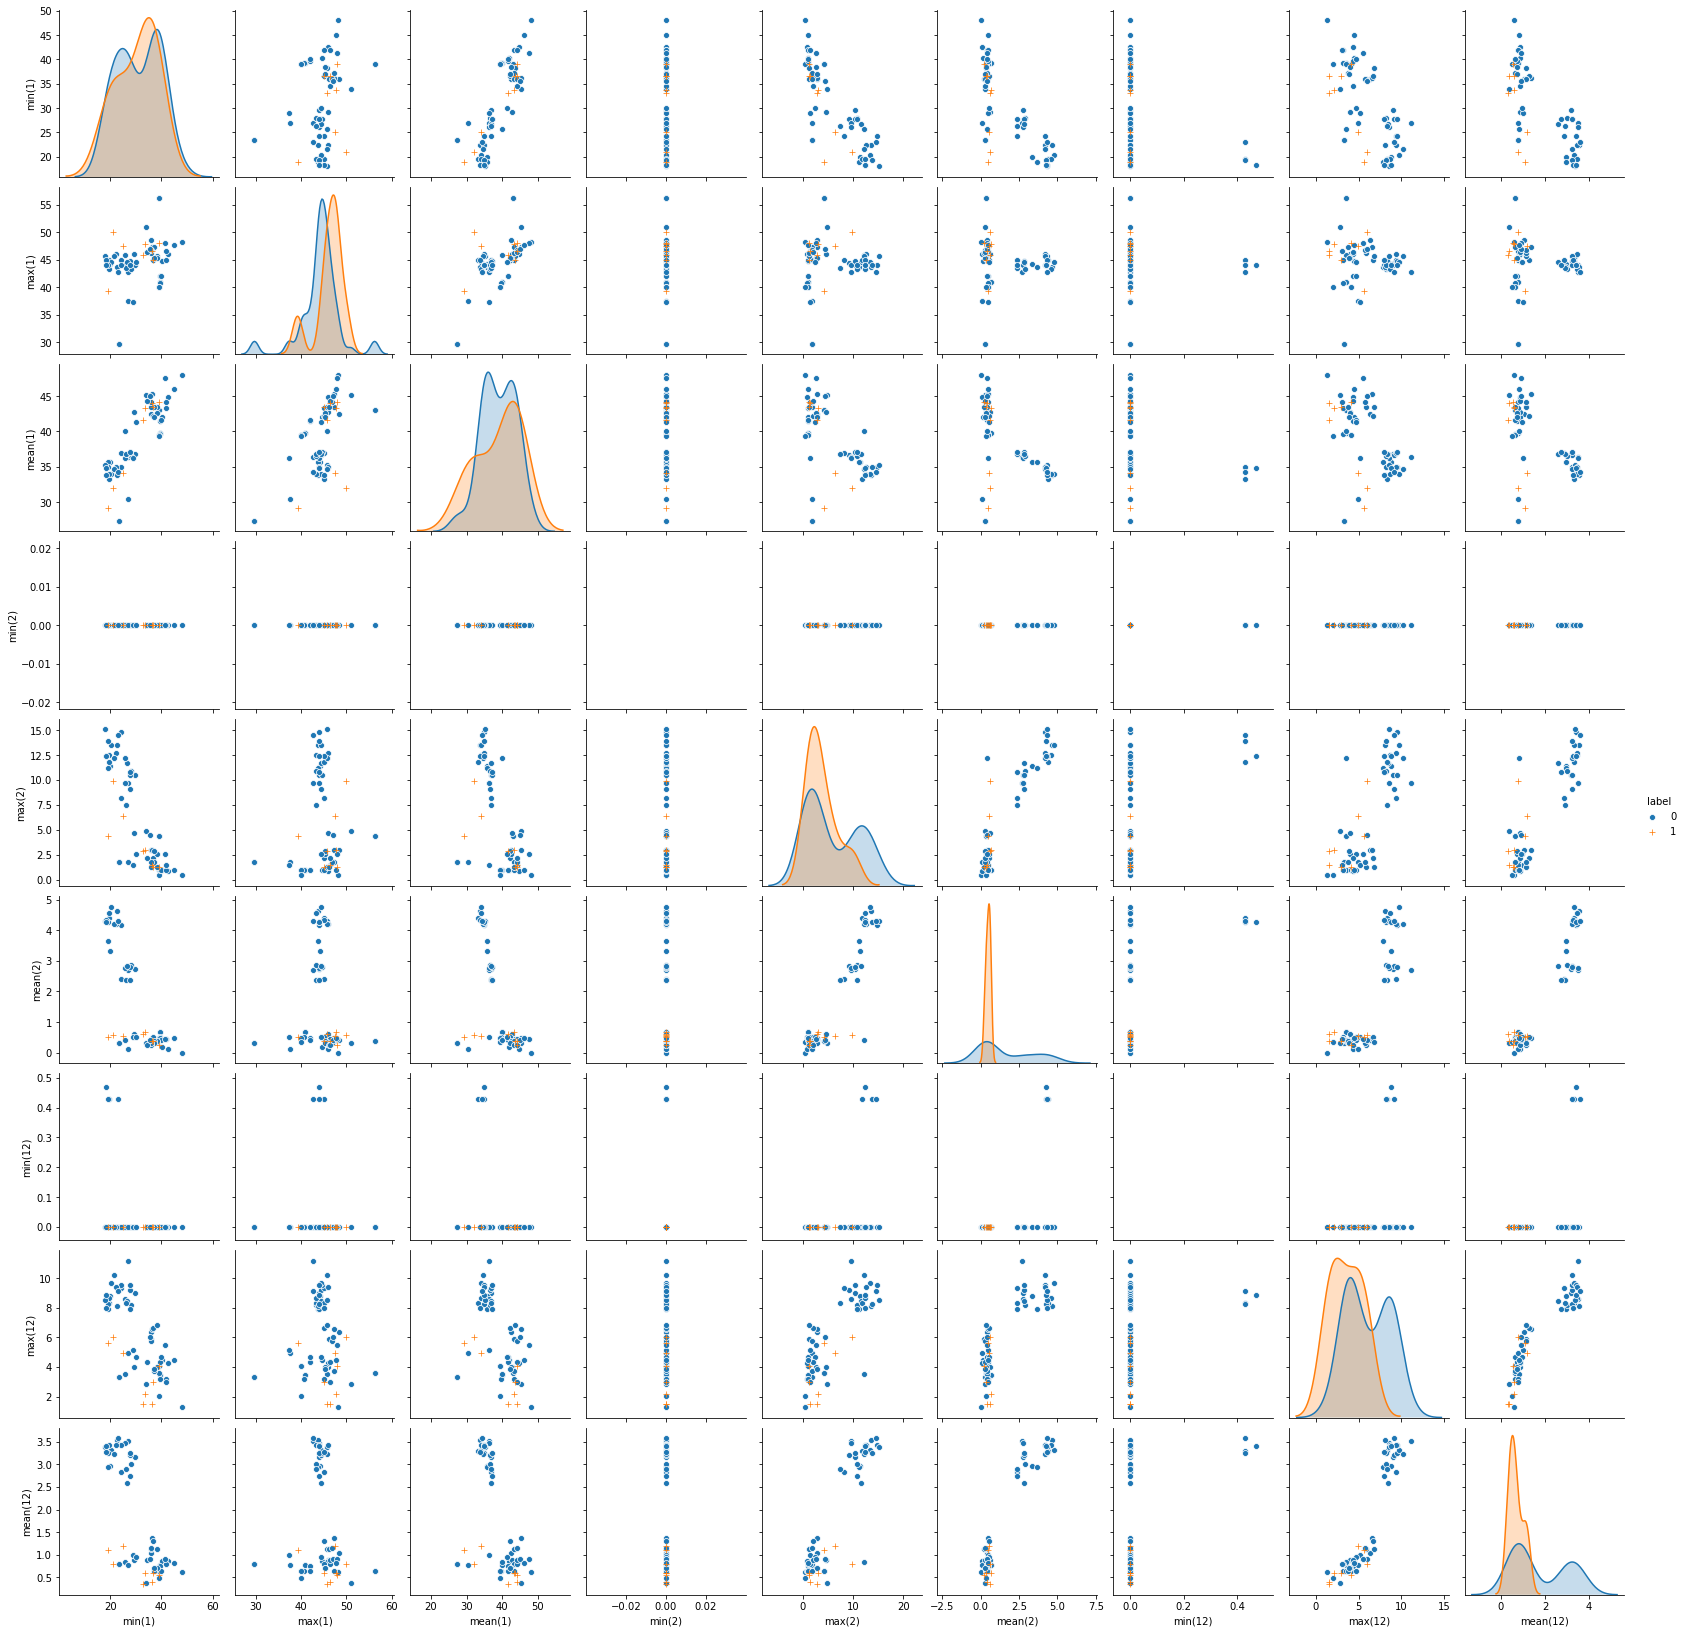

In [9]:
features = ['min(1)', 'max(1)', 'mean(1)', 'min(2)', 'max(2)', 'mean(2)', 'min(12)', 
            'max(12)', 'mean(12)', 'label']
specified_features = train_features[features]
sns.pairplot(specified_features, hue="label", markers=["o", "+"])
plt.show()

**no much difference**

#### 3)

In [10]:
import statsmodels.api as sm

In [11]:
train_features = pd.DataFrame()

for parts in range(1, 21):
    for fileindex, path in enumerate(train_paths):
        
        label = path.split("\\")[3]
        df = pd.read_csv(path,skiprows=range(4))
        
        division = len(df) / float(parts)
        list = [df.to_numpy()[int(round(division * i)): int(round(division * (i + 1)))] 
            for i in range(parts)]
        
        datalist = []
        for index in range(len(list)):
            datalist.append(pd.DataFrame(list[index]))
            
        train_feature = pd.DataFrame()
        for datapoint in datalist:
            train = pd.DataFrame()
            for index, column in enumerate(datapoint.columns[1:]):
                data = {"min(" + str(index + 1) + ")": datapoint[column].min(),
                        "max(" + str(index + 1) + ")": datapoint[column].max(),
                        "mean(" + str(index + 1) + ")": datapoint[column].mean(),
                        "median(" + str(index + 1) + ")": datapoint[column].median(),
                        "standard deviation(" + str(index + 1) + ")": datapoint[column].std(),
                        "1st quart(" + str(index + 1) + ")": datapoint[column].quantile(.25),
                        "3rd quart(" + str(index + 1) + ")": datapoint[column].quantile(.75)
                        }
                temp = pd.DataFrame(data, index=[fileindex+1])
                train = pd.concat([train, temp], axis=1)
            train_feature = train_feature.append(train)

        train_feature["label"] = 1 if label == "bending1" or label == 'bending2' else 0
        train_features = train_features.append(train_feature)
    
# print(train_features.head(5))

    labels = []
    for index in range(6):
        labels.extend(["min(" + str(index + 1) + ")",
                       "max(" + str(index + 1) + ")",
                       "mean(" + str(index + 1) + ")",
                       "median(" + str(index + 1) + ")",
                       "standard deviation(" + str(index + 1) + ")",
                       "1st quart(" + str(index + 1) + ")",
                       "3rd quart(" + str(index + 1) + ")"])
    
    logitModel = sm.Logit(train_features['label'], 
                      train_features[labels])
    logitModelResults = logitModel.fit(method="bfgs",disp=0)


MissingDataError: exog contains inf or nans

#### 4)

#### 5)

#### 6)

#### 7)

### e)

#### 1)

#### 2)

### f)

#### 1)

#### 2)

#### 3)

## 2. ISLR 3.7.4

#### a)

**For training error rate, we will get lower RSS when using cubic regression. When we use polynomial features, we get more parameters. our model will be more flexible, so it will be more close to all training data.**

#### b)

**For test error rate, we will get higher RSS when using cubic regression. When we use polynomial features, the model will overfit. So even if it's more close to all training data, it can't generalize to new data.**

c)

**For training error rate, we will get lower RSS when using cubic regression. because our model will be more flexibel and be more close to all training data.**

d)

**For test error rate, we will still get a lower RSS when using cubic regression. because the true function is non-linear, the linear model can't fit very well.**

## 3. ISLR, 4.7.3

![](https://user-images.githubusercontent.com/18362787/85916299-5265ba80-b804-11ea-85fd-8ca2122f8572.jpg)

## 4. ISLR 4.7.7

![](https://user-images.githubusercontent.com/18362787/85916300-52fe5100-b804-11ea-83a8-73f52574f0b7.jpg)